In [1]:
import sys
sys.path.append("..")
from src import *
import pandas as pd
import numpy as np
import sqlite3


In [2]:
con = sqlite3.connect("covid-db")
df = pd.read_sql_query("select * from patients",con)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
df.result.value_counts()

result
0    755
1    108
Name: count, dtype: int64

In [5]:
minority = df[df.result==1]
majority = df[df.result==0]


In [6]:
minority

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
14,105,8,1,57.0,0,1,14,31,19,12,3,1,0,1
32,42,8,1,68.0,0,1,14,31,19,12,3,1,0,1
34,39,8,1,72.0,0,1,14,31,19,12,3,1,0,1
104,135,8,1,63.0,0,1,14,31,19,12,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,112,25,1,69.0,0,0,14,31,19,12,3,1,0,1
793,72,25,2,77.0,0,0,14,31,19,12,3,1,0,1
811,72,25,2,66.0,0,0,14,31,19,12,3,1,0,1
857,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1


In [7]:
majority

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,10,4,0,49.4,0,0,14,31,19,12,3,1,0,0
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [19]:
from sklearn.model_selection import train_test_split
def print_shapes(X_train,X_test,y_train,y_test):
    print(f"shape of X_train: {X_train.shape}")
    print(f"shape of X_test: {X_test.shape}")
    print(f"shape of y_train: {y_train.shape}")
    print(f"shape of y_test: {y_test.shape}")
# split the minority first
X_min = minority.drop(['result'],axis=1)
y_min = minority['result']
X_maj = majority.drop(['result'],axis=1)
y_maj = majority['result']
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X_min, y_min, test_size=0.1, random_state=2023)
X_train_maj, X_test_maj, y_train_maj, y_test_maj = train_test_split(X_maj, y_maj, test_size=0.3, random_state=2023)
print("Min-instances")
print_shapes(X_train_min, X_test_min, y_train_min, y_test_min)
print("Manj-instances")
print_shapes(X_train_maj, X_test_maj, y_train_maj, y_test_maj)


Min-instances
shape of X_train: (97, 13)
shape of X_test: (11, 13)
shape of y_train: (97,)
shape of y_test: (11,)
Manj-instances
shape of X_train: (528, 13)
shape of X_test: (227, 13)
shape of y_train: (528,)
shape of y_test: (227,)


In [56]:
# combine min test and train with the majority 
X_train = pd.concat([X_train_min, X_train_maj], axis=0)
y_train = pd.concat([y_train_min,y_train_maj],axis=0)
X_test  = pd.concat([X_test_min, X_test_maj], axis=0)
y_test = pd.concat([y_test_min, y_test_maj], axis=0)
df_train = X_train.copy()
df_train['target'] = y_train
df_train

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,target
508,110,28,1,85.0,0,0,14,31,19,12,3,1,0,1
742,45,13,0,68.0,0,0,14,31,19,12,3,1,4,1
220,117,18,1,75.0,0,0,6,16,19,12,3,1,1,1
520,114,29,0,73.0,0,1,14,31,19,12,3,1,0,1
781,112,25,1,69.0,0,0,14,31,19,12,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,118,7,0,55.0,1,0,14,31,19,12,3,1,0,0
838,61,19,2,49.4,0,0,14,31,19,12,3,1,0,0
800,123,25,1,49.4,0,0,14,31,19,12,3,1,0,0
512,110,28,1,49.4,0,0,14,31,19,12,3,1,0,0


In [57]:
df_train.target.value_counts()

target
0    528
1     97
Name: count, dtype: int64

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline(
    [
        ('pca',PCA(n_components=3)),
        ('scaler',StandardScaler())
    ]
)
projected = pipeline.fit_transform(X_train,y_train)

In [38]:
projected

array([[-0.84004876, -2.23573806, -0.57382118],
       [ 0.84615234, -1.05762289, -0.80406461],
       [-1.00249393, -1.70759049,  1.06357262],
       ...,
       [-1.18170168,  0.02006523, -0.12987821],
       [-0.85393069,  0.01931661,  0.05047675],
       [ 1.68536386,  0.1528196 , -0.44374089]])

In [35]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [72]:
# parameters to tune
# max_depth
# min_samples_split
# class_weight to handle imbalancing problem
# max_leaf_nodes
from sklearn.model_selection import GridSearchCV ,ParameterGrid as pg
param = {
    "max_depth": [4,8,12,16,20,24],
    "class_weight": [{0: 1.0, 1: weight} for weight in np.linspace(1, 10, 10)],
    "max_features": ['sqrt', 'log2'],
    
}
tree = DecisionTreeClassifier(random_state=2023)


In [88]:
import mlflow
import mlflow.sklearn
import warnings as warn
from  tqdm import tqdm
import os
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score as acs, classification_report as cr
# configure ML-flow
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
mlflow.set_tracking_uri("http://127.0.0.1:5000")  
mlflow.set_experiment("DT-Exp-1")

with warn.catch_warnings():
    warn.filterwarnings("ignore", category=UserWarning, module='.*distutils.*')
    with mlflow.start_run() as run:
        params_comb=pg(param)
        with tqdm(total=len(params_comb), desc="Processing", ncols=100) as pbar:
            for par in params_comb:
                temp = {key: [value] if not isinstance(value, list) else value for key, value in par.items()}
                mlflow.log_params( par)
                clfs = DecisionTreeClassifier(**par,random_state=2023)
                clfs.fit(pipeline.fit_transform(X_train), y_train)

                
                model_predictions = clfs.predict(pipeline.transform(X_test))
                model_accuracy_score = acs(y_test,model_predictions)
                model_f1_score = f1_score(y_test,model_predictions)
                fpr, tpr, _ = roc_curve(y_test, model_predictions)
                roc_auc = auc(fpr, tpr)
                # Explicitly ignore the UndefinedMetricWarning
                with warn.catch_warnings():
                    warn.filterwarnings("ignore", category=Warning)
                mlflow.log_metric("accuracy", model_accuracy_score)
                mlflow.log_metric("f1-score",model_f1_score)
                mlflow.log_metric("roc-auc",roc_auc)
                mlflow.sklearn.log_model(clfs, "DT_model")
                mlflow.end_run()
                pbar.update(1)

Processing: 100%|█████████████████████████████████████████████████| 120/120 [06:02<00:00,  3.02s/it]


In [103]:
import mlflow
logged_model = 'runs:/388d138d83b14ed18e4e020c5c61bd67/DT_model'
loaded_model = mlflow.sklearn.load_model(logged_model)

[[218   9]
 [  1  10]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       227
           1       0.53      0.91      0.67        11

    accuracy                           0.96       238
   macro avg       0.76      0.93      0.82       238
weighted avg       0.97      0.96      0.96       238



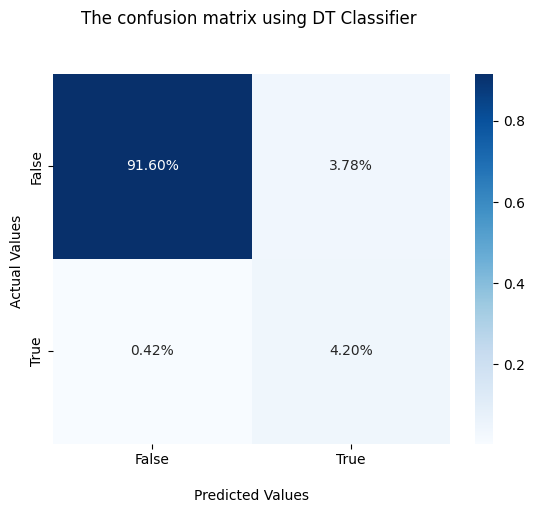

In [100]:
# Function to plot the confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def cmatrix_fun(model_name, actual, predicted):
    # check the confusion matrix
    cm = confusion_matrix(actual, predicted) 
    print(cm)

    # Plot the CM
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
cmatrix_fun('DT', y_test, loaded_model.predict(pipeline.transform(X_test)))
print(cr(y_test, loaded_model.predict(pipeline.transform(X_test)), zero_division=1))

In [107]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()    

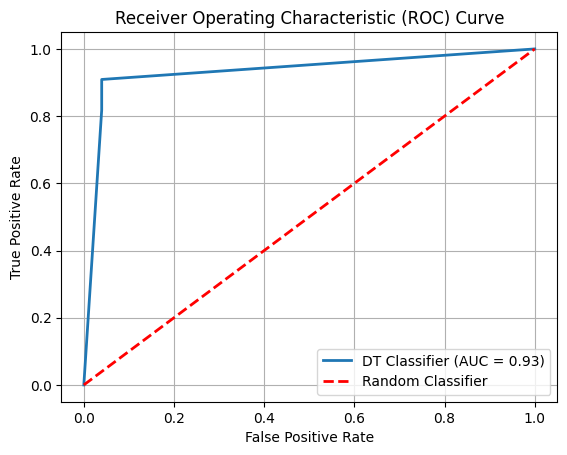

In [122]:
import matplotlib.pyplot as plt
prob_pred = loaded_model.predict_proba(pipeline.transform(X_test))[:,1]
fpr, tpr, _ = roc_curve(y_test,prob_pred )
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2,label=f'DT Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC-for-DT.png')
plt.show()


In [117]:
acs(y_true=y_train,y_pred=loaded_model.predict(pipeline.transform(X_train)))

0.9952

In [118]:
acs(y_true=y_test,y_pred=loaded_model.predict(pipeline.transform(X_test)))

0.957983193277311